#**Netflix and tv show data analysis**

## Project Objective

The objective of this project is to analyze Netflix movies and TV shows data to understand content distribution, genre popularity, country-wise content availability, and trends over time. The analysis aims to provide insights into Netflix’s content strategy and growth patterns.


## Business Questions

1. What is the distribution of Movies vs TV Shows on Netflix?
2. How has Netflix content grown over the years?
3. Which genres are most popular on Netflix?
4. Which countries produce the most Netflix content?
5. What is the average duration of Movies and TV Shows?
6. How does content addition vary by year?


## Importing dataset

In [2]:
# Importing necessary libraries need for import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Warning module
import warnings
warnings.filterwarnings('ignore')

In [6]:
# mount the google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [8]:

df = pd.read_csv('/content/Netflix data.csv', encoding='latin1')
df.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


## Data understanding

In [ ]:
# Chceking columns
df.columns

Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')

In [ ]:
# Rows and columns
print("Total number of row :",df.shape[0])
print("Total number of columns :",df.shape[1])

Total number of row : 77801
Total number of columns : 5


Insights:
- As you can see there are 77801 rows.
- and only 5 columns.

In [ ]:
# to check information
print("Data information:")
df.info()

Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77801 entries, 0 to 77800
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77801 non-null  int64 
 1   id         77801 non-null  object
 2   name       77801 non-null  object
 3   character  68029 non-null  object
 4   role       77801 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.0+ MB


Insights:
- The dataset consists mainly of categorical columns and contains missing values in the `character` column.

In [ ]:
# Data types
print("Data types:")
df.dtypes


Data types:


,0
person_id,int64
id,object
name,object
character,object
role,object


Insights:
- Only for person_id data type is int.
- and remaining columns are categorial.

In [ ]:
# Descriptive statistics
df.describe()

,person_id
count,7.780100e+04
mean,5.294888e+05
std,6.430167e+05
min,7.000000e+00
25%,4.530600e+04
50%,1.983580e+05
75%,8.880960e+05
max,2.462818e+06


Insights:
- The dataset contains 77,801 records for the `person_id` column.
- The wide range between the minimum and maximum values indicates high variability in the data.
- The large standard deviation suggests that the values are widely spread rather than concentrated around the mean.


## Cleaning missing data

Here we check for missing values, if needed then convertion of data types and duplicate records.

In [ ]:
# Checking for missing values
df.isnull().sum()

,0
person_id,0
id,0
name,0
character,9772
role,0


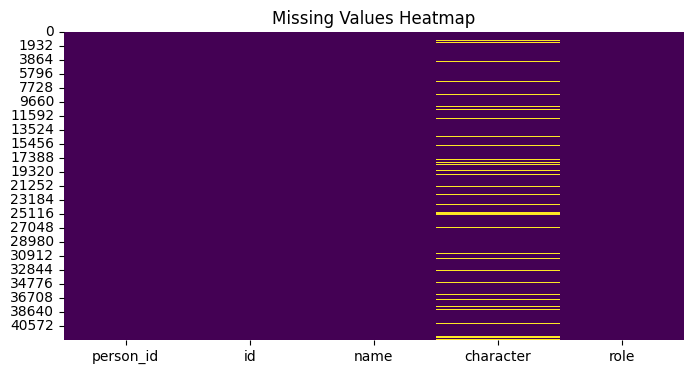

In [10]:
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

Insights:
- There are 9772 missing values in character.
- So, instead of deleting replace Null values.

In [11]:
# Filling missing values.
df['character']=df['character'].fillna("Unknown")

In [ ]:
# Again check missing values
df.isnull().sum()

,0
person_id,0
id,0
name,0
character,0
role,0


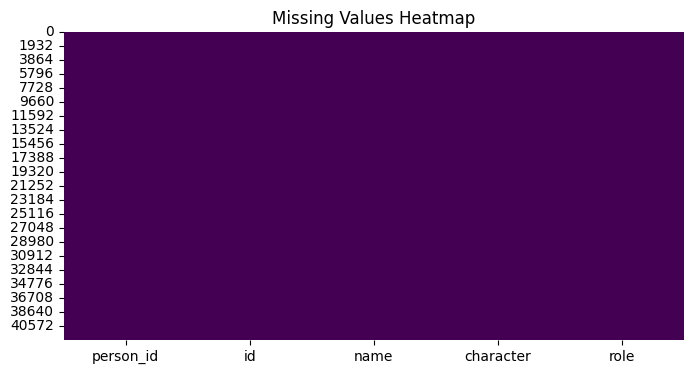

In [12]:
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

 Insights:
- The `character` column contained missing values.
- Since it is a categorical column and not critical for core analysis, missing values were replaced with "Unknown" to preserve all records.


### Removing Duplicates

In [ ]:
df.columns

Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')

In [ ]:
# Removing duplicate records
df.duplicated().sum()

np.int64(0)

In [ ]:
df = df.drop_duplicates()

Insights:
- Duplicate records were checked and removed to ensure data consistency.


### Standardize Text Data

In [ ]:
df['name'] = df['name'].str.strip()
df['role'] = df['role'].str.lower()
df['character'] = df['character'].str.strip()

In [ ]:
df.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,actor
1,14658,tm84618,Jodie Foster,Iris Steensma,actor
2,7064,tm84618,Albert Brooks,Tom,actor
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,actor
4,48933,tm84618,Cybill Shepherd,Betsy,actor


Insights:
- Text columns were cleaned by removing extra spaces and standardizing text format.


### Validate ID Column

In [ ]:
df[['person_id', 'id']].isnull().sum()

,0
person_id,0
id,0


Insights:
- ID columns were validated to ensure no missing or incorrect values.


### Rename columns

In [ ]:
df.rename(columns={'id': 'title_id'}, inplace=True)

In [ ]:
df.head()

,person_id,title_id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,actor
1,14658,tm84618,Jodie Foster,Iris Steensma,actor
2,7064,tm84618,Albert Brooks,Tom,actor
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,actor
4,48933,tm84618,Cybill Shepherd,Betsy,actor


Insights:
- Columns were renamed for better readability and clarity.

In [ ]:
# Checking comman role
df['role'].value_counts()

,count
role,
actor,73251
director,4550


## Insights:
###Data Cleaning Summary

- The dataset was checked for missing values, duplicates, and inconsistencies.
- Missing values in the `character` column were handled by replacing them with "Unknown".
- Text columns were standardized, and duplicate records were removed to ensure data quality.


## Exploratory Data Analysis(EDA)

In [ ]:
# Comman role
df['role'].value_counts()

,count
role,
actor,73251
director,4550


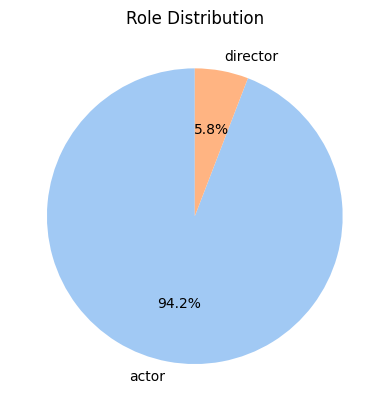

In [ ]:
df['role'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel')
)
plt.title('Role Distribution')
plt.ylabel('')
plt.show()


Insight:
- The dataset is dominated by actors, indicating a strong focus on cast-related information.


In [ ]:
# Unique person
df['person_id'].nunique()

54589

Insight:
- The dataset contains a large number of unique individuals, showing broad representation of people involved in productions.


In [ ]:
# 10 MOST frequent people
df['name'].value_counts().head(10)

,count
name,
Boman Irani,25
Kareena Kapoor Khan,25
Shah Rukh Khan,23
Takahiro Sakurai,21
Priyanka Chopra Jonas,20
Paresh Rawal,20
RaÃºl Campos,20
Amitabh Bachchan,20
Nawazuddin Siddiqui,19


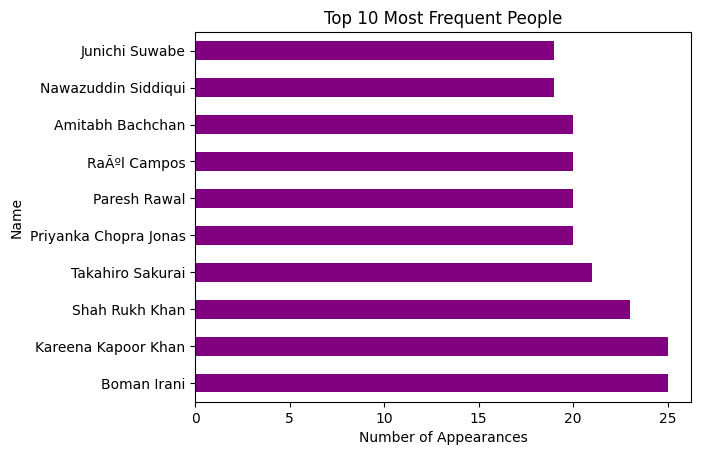

In [ ]:
df['name'].value_counts().head(10).plot(
    kind='barh',
    color='purple'
)
plt.title('Top 10 Most Frequent People')
plt.xlabel('Number of Appearances')
plt.ylabel('Name')
plt.show()


Insight:
- A small group of individuals appear frequently, suggesting repeated involvement across multiple titles.


In [ ]:
# Unknown count
df[df['character'] == 'Unknown'].shape[0]


9772

 Insight:
- A significant number of records have unknown character names, indicating incomplete role-level information.


In [ ]:
df['character'].value_counts().head(10)

,count
character,
Unknown,9772
Self,1950
Himself,1276
Herself,426
Self (archive footage),330
Dancer,149
(voice),128
Additional Voices (voice),127
Nurse,77


<Axes: title={'center': 'Top 10 Most Common Characters'}, ylabel='character'>

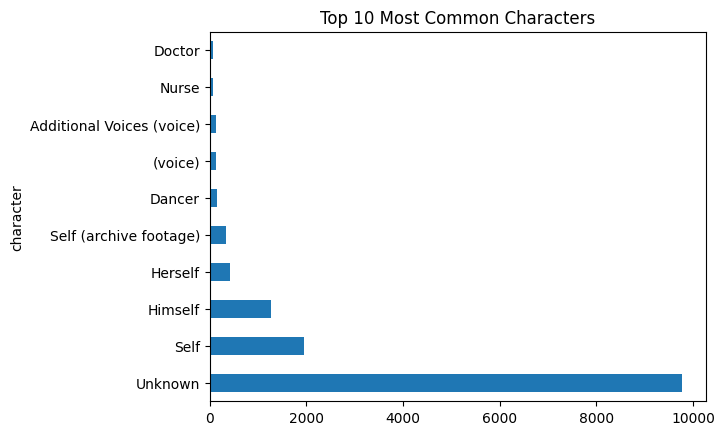

In [ ]:
df['character'].value_counts().head(10).plot(kind='barh', title='Top 10 Most Common Characters')


Insight:
- Certain character names appear repeatedly, which may represent common or unnamed roles.


In [ ]:
df.columns

Index(['person_id', 'title_id', 'name', 'character', 'role'], dtype='object')

In [ ]:
# How many titles each person works on
person_counts = df.groupby('name')['title_id'].count()
person_counts.describe()


,title_id
count,54314.000000
mean,1.432430
std,1.184525
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,25.000000


Insight:
- Most individuals appear in a limited number of titles, while a few contribute extensively across multiple productions.


In [ ]:
df.groupby('role')['character'].apply(lambda x: (x == 'Unknown').sum())


,character
role,
actor,5222
director,4550


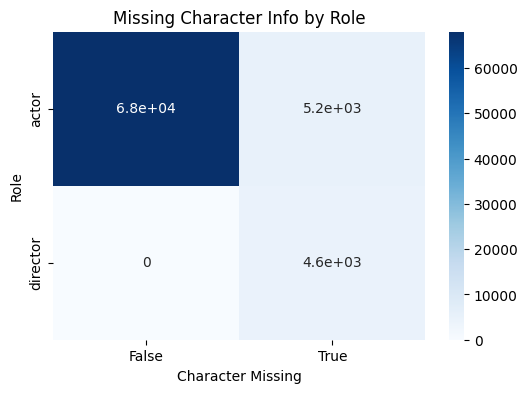

In [ ]:
heatmap_data = pd.crosstab(df['role'], df['character'] == 'Unknown')

plt.figure(figsize=(6,4))
sns.heatmap(heatmap_data, annot=True, cmap='Blues')
plt.title('Missing Character Info by Role')
plt.xlabel('Character Missing')
plt.ylabel('Role')
plt.show()


Insights:
- Missing character information is more common for certain roles, indicating role-specific data limitations.


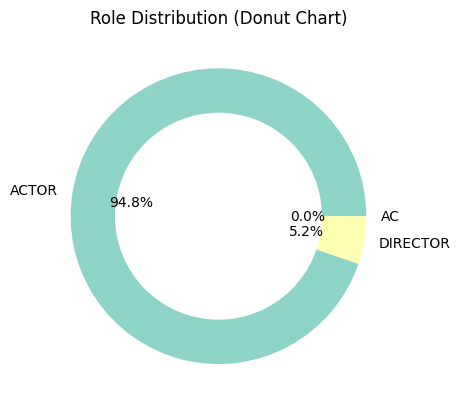

In [13]:
# Role distriibution through pie chart
role_counts = df['role'].value_counts()

plt.pie(
    role_counts,
    labels=role_counts.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('Set3')
)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Role Distribution (Donut Chart)')
plt.show()


## EDA Summary

- The analysis explored role distribution, individual participation frequency, and character data completeness.
- The dataset is actor-dominated, with a small group of individuals appearing frequently.
 - Missing character information is present but does not significantly affect high-level insights.


## Overall Summary

- In this project, exploratory data analysis was performed on a people and cast dataset containing information about individuals, their roles, and character details. The dataset was first understood by examining its structure, data types, and descriptive statistics.

- Data cleaning steps included handling missing values in the `character` column by replacing them with "Unknown", removing duplicate records, and standardizing text fields to ensure consistency. A missing value heatmap was used to visually confirm data completeness after cleaning.

- Exploratory data analysis revealed that the dataset is dominated by actor roles, with a small number of individuals appearing frequently across multiple titles. Most records contain complete information, making the dataset suitable for role-based and participation analysis.

- Overall, this analysis provides insights into role distribution, individual participation patterns, and data quality, forming a strong foundation for further analysis or visualization.
